<a href="https://colab.research.google.com/github/Seyed-Arvin-ghafarizadeh/Seyed-Arvin-ghafarizadeh/blob/main/Copy_of_Simulation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No handles with labels found to put in legend.


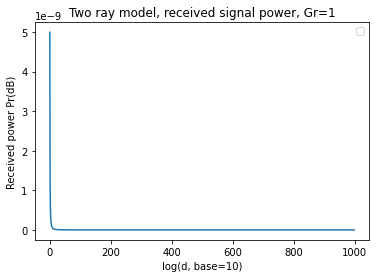

In [ ]:
import numpy as np
from scipy import signal
import math
from matplotlib import pyplot as plt

"""
Two-ray model, received signal power, Gr=1
dr=1m
fc=900MHz, R=-1, ht=50m, hr=2m, G0=G1=1=0dB

"""
# There are two approaches:
# 1) Two-ray model Power falloff
# 2) Piecewise linear approximation
# Number one
# f=C/landa
C = 2 * (10 ** 8)
fc = 900 * 10 ** 9  # 900Mhz
landa = C / fc
Pt = 16  # 16watt
d = d0 = 1000
d1 = 1100  # d1= d11 + d12
R = -1
G0 = 1
G1 = 1
delta_phi = (2 * math.pi * (d1 - d0)) / landa
term1 = (np.sqrt(G0) / d0)
# term2 = ((R * np.sqrt(G1) * math.exp(-1j * delta_phi)) / d1).real
term2 = ((R * np.sqrt(G1) * math.cos(delta_phi)) / d1)
pr = Pt * ((landa / (4 * math.pi)) ** 2) * (abs(term1 + term2)) ** 2
pr_1 = []
for i in range(1, d, 1):
    d = i
    d0 = d
    delta_phi = (2 * math.pi * (d1 - d0)) / landa
    term1 = np.sqrt(G0) / d0
    term2 = ((R * np.sqrt(G1) * math.cos(delta_phi)) / d1)
    pr = Pt * ((landa / (4 * math.pi)) ** 2) * (abs(term1 + term2)) ** 2
    pr_1.append(pr)

plt.plot(pr_1)
plt.xlabel('log(d, base=10)')
plt.ylabel('Received power Pr(dB)')
plt.title('Two ray model, received signal power, Gr=1')
plt.legend()
plt.show()

# Number two
